# Variance and spread of relevant features

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
import kagglegym


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

train.h5



In [2]:
# Create environment
env = kagglegym.make()

# Get first observation
observation = env.reset()

# Get the train dataframe
train = observation.train

In [3]:
#print(train)

In [4]:
#new_observation, reward, done, info = env.step(observation.target)

In [5]:
#train = train.append(new_observation.features, ignore_index=True)
#print(train)

In [6]:
# fill missing values with mean:
pd.set_option('max_columns', 200)
mean_values = train.mean(axis=0)
train.fillna(mean_values, inplace=True)
train.head(5)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-6.316399e-03,0.222831,-0.213030,0.729277,-0.335633,1.132921e-01,1.621238,-0.179404,0.68374,-0.072108,0.249187,0.024401,-0.127942,0.316813,1.412742,-0.029575,1.265246,-0.055747,1.592256,-0.285275,-0.212888,0.404180,0.116903,0.197590,-0.197455,-0.195023,-0.059886,-0.021199,-0.013555,-0.236371,-0.253357,0.575562,0.283947,-0.006208,0.616351,-0.034578,0.732652,-0.002432,-0.092508,-0.072185,0.447296,-0.194318,0.264373,0.018763,3010.825195,-0.145278,-0.108547,0.148189,-0.226942,0.262864,-0.252933,-0.113265,0.180559,-0.033812,0.042951,-0.068031,0.208402,-0.082743,1.061059,1.120801,-0.228200,-0.119987,-0.131929,-0.145985,-1.559887e-01,-0.035507,0.037680,-0.110647,0.0006,-2.0,0.001918,0.000874,-2.0,-0.273957,-0.024876,-2.000000,-2.0,-0.182593,0.001652,-2.0,-0.006454,-2.0,-0.037126,0.652981,0.000000,-0.142453,0.0,0.002735,0.000612,1.427469,0.000461,-2.0,0.0,0.000467,-0.087753,0.017206,0.0,0.937880,0.775208,-0.098557,-0.090948,-0.080027,-0.414776,0.00601,-0.028033,-2.0,0.000783,-0.011753
1,11,0,0.014765,-3.806422e-02,-0.017425,0.320652,-0.034134,0.004413,1.142851e-01,-0.210185,0.216281,0.09675,0.082042,-0.224383,-0.085529,0.024763,-0.062337,-0.202247,1.746692,-0.187505,-0.034664,-0.135177,0.305562,0.027595,-0.208746,0.118520,-0.123511,0.113818,0.065534,-0.115837,0.028282,0.076565,-0.217346,0.100054,0.358808,0.057505,0.025719,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.126232,-0.131619,0.232268,-0.001455,-0.489863,0.017317,0.027321,0.334183,0.113513,0.111536,-0.179379,0.221287,-0.091886,0.260047,0.107982,0.548687,-0.160079,-0.281368,0.063933,-0.235643,-0.205083,-0.194349,-0.365186,0.041928,-0.044907,-3.907863e-02,-0.075000,-0.280418,-0.110647,0.0006,-2.0,0.001918,0.000874,-2.0,-0.159432,-0.024876,0.000000,-2.0,-0.182593,0.004317,0.0,-0.006454,-2.0,-0.037126,-0.399520,0.000000,-0.309356,-0.5,0.002735,0.000612,0.154613,0.000461,0.0,0.0,0.000467,-0.087753,0.017206,0.5,0.232154,0.025590,-0.098557,-0.090948,-0.080027,-0.273607,0.00601,-0.028033,-2.0,0.000783,-0.001240
2,12,0,-0.010622,-5.057707e-02,3.379575,-0.157525,-0.068550,-0.155937,1.219439e+00,-0.764516,0.010489,0.68374,-0.051418,-0.258330,-0.122140,-0.121041,-0.058287,-0.899515,-0.022131,-0.079002,-0.031116,-0.100603,-0.341474,-0.007522,0.077977,-0.149581,0.036946,0.166182,0.065534,0.172751,0.961091,1.028205,-0.165369,0.056006,0.019375,0.249530,-0.156078,0.024836,0.019192,0.053364,-0.020247,0.343362,0.064028,-0.249106,-0.106216,-0.085509,0.383589,3010.825195,-0.074021,-0.054295,-0

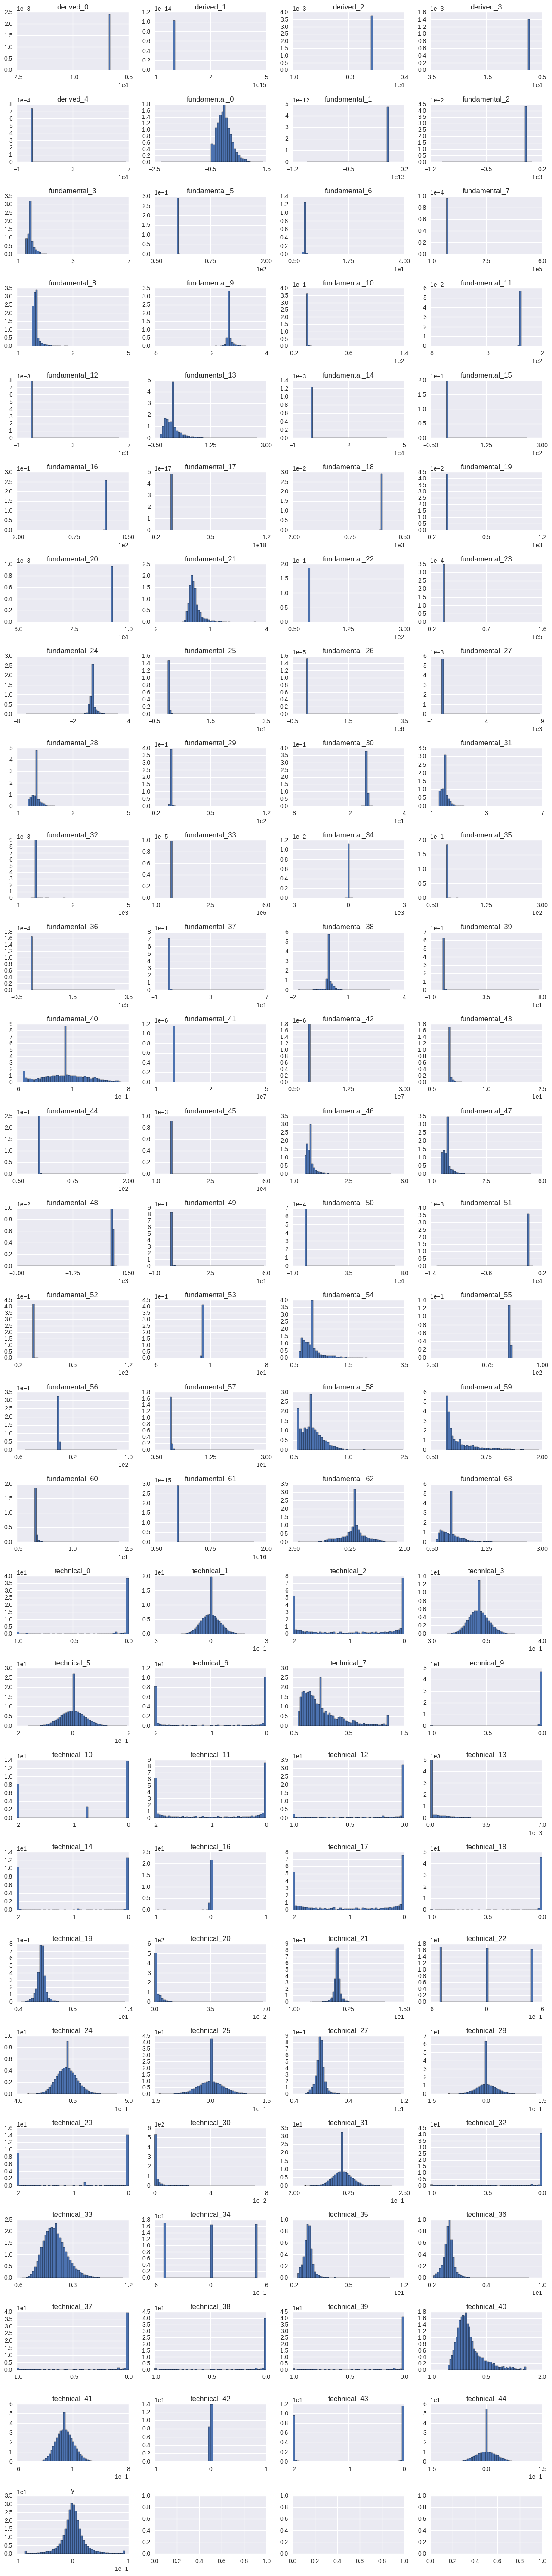

In [7]:
## histogram of each feature
features_cols = [x for x in train.columns if x not in ['id', 'timestamp']]
n_features = len(features_cols)
fig, ax = plt.subplots(nrows=int(np.ceil(len(features_cols)/4)), 
                       ncols=4, figsize=(13,60), squeeze=True)
ax = ax.ravel() # or flatten()
nplot = 0

for feature in features_cols:
    ax[nplot].hist(train[feature], bins = 50, normed=True)
    ax[nplot].set_title(feature)
    start, end = ax[nplot].get_xlim()
    ax[nplot].xaxis.set_ticks(np.linspace(start, end, num=3))
    ax[nplot].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    nplot = nplot + 1
plt.tight_layout()

In [8]:
fundamentals_to_use = [0, 3, 8, 9, 13, 21, 24, 31, 38, 40, 46, 47, 54, 58, 59, 62, 63]
fundamentals_to_use = ['fundamental_%d' %l for l in fundamentals_to_use]
technicals_to_use = [1, 2, 3, 5, 6, 7, 11, 17, 19, 20, 21, 24, 25, 27, 28, 30, 31, 33,
                     35, 36, 40, 41, 43, 44]
technicals_to_use = ['technical_%d' %l for l in technicals_to_use]
features = fundamentals_to_use + technicals_to_use

In [9]:
print(np.min(train.y), '< y <', np.max(train.y))

-0.0860941 < y < 0.0934978


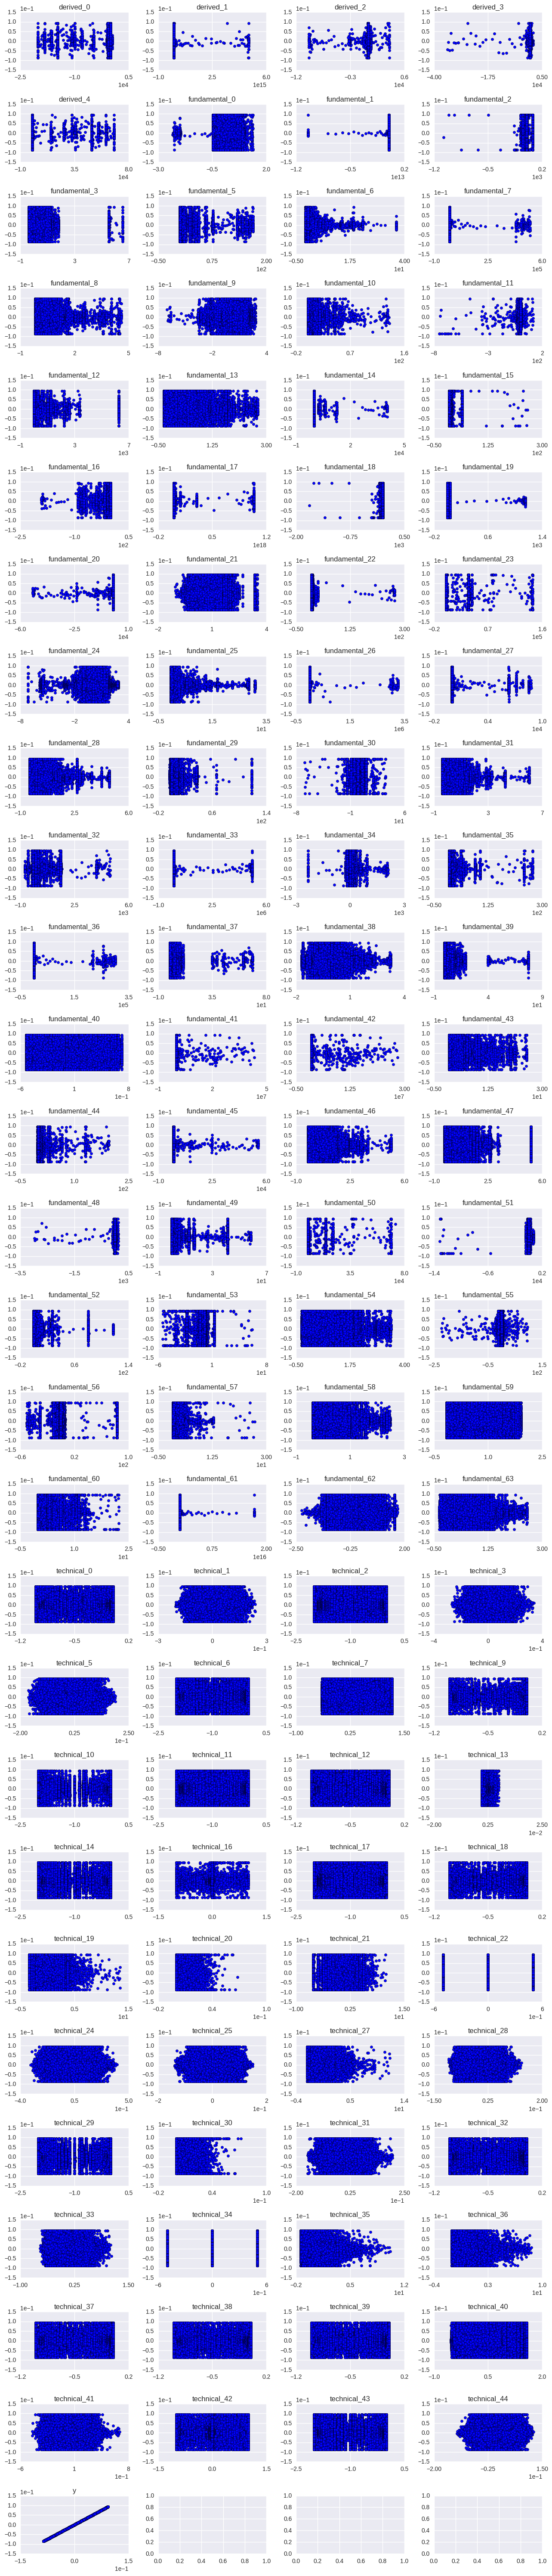

In [10]:
## scatter plot of each feature against the target
features_cols = [x for x in train.columns if x not in ['id', 'timestamp']]
n_features = len(features_cols)
fig, ax = plt.subplots(nrows=int(np.ceil(len(features_cols)/4)), 
                       ncols=4, figsize=(13,60), squeeze=True)
ax = ax.ravel() # or flatten()
nplot = 0

for feature in features_cols:
    ax[nplot].scatter(train[feature], train.y, s=20)
    ax[nplot].set_title(feature)
    start, end = ax[nplot].get_xlim()
    ax[nplot].xaxis.set_ticks(np.linspace(start, end, num=3))
    ax[nplot].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    nplot = nplot + 1
plt.tight_layout()